<a href="https://colab.research.google.com/github/Kaustubh-Atey/Codes/blob/master/KNN_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [149]:
df = pd.read_csv('https://query.data.world/s/nodpxjbgrswkwkty546bvulbnfa3pp')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [132]:
dataset = pd.read_csv('Pokemon.csv')
dataset.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,0,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,0,405,60,62,63,80,80,60,1,0
2,3,Venusaur,0,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,0,625,80,100,123,122,120,80,1,0
4,4,Charmander,1,309,39,52,43,60,50,65,1,0


In [0]:
X = dataset[['#', 'Total','HP',	'Attack',	'Defense','Sp. Atk','Sp. Def','Speed'	,'Generation','Legendary']].values
y = dataset.iloc[:, 2].values

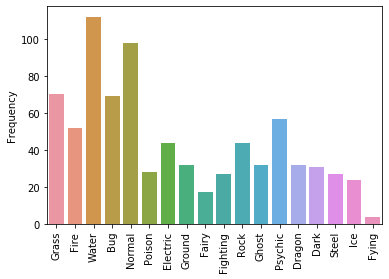

In [152]:
freq = pd.value_counts(y).to_frame(name='Frequency').sort_index()
label = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Rock', 'Ghost', 'Psychic','Dragon', 'Dark', 'Steel', 'Ice', 'Fying']
ax = sns.barplot(x = label , y = freq.Frequency, data= freq)
plt.xticks( rotation = 90)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.06      0.05        18
           1       0.18      0.44      0.26         9
           2       0.10      0.21      0.14        19
           3       0.25      0.29      0.27        14
           4       0.35      0.42      0.38        19
           5       1.00      0.25      0.40         4
           6       0.75      0.33      0.46         9
           7       0.00      0.00      0.00         7
           8       0.33      0.33      0.33         3
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.31      0.40      0.35        10
          13       0.25      0.12      0.17         8
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         9
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

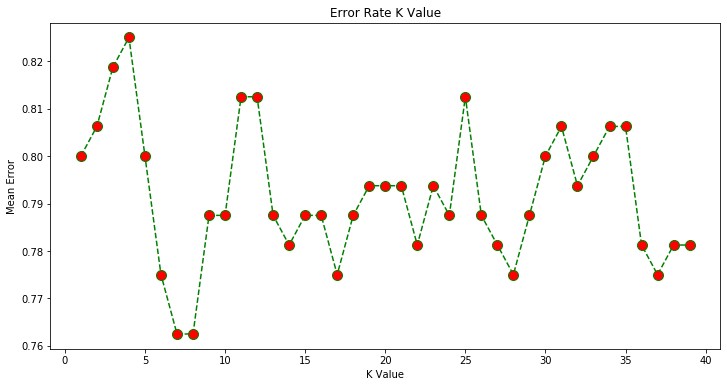

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')